In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# [Harris Corner Detection](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)

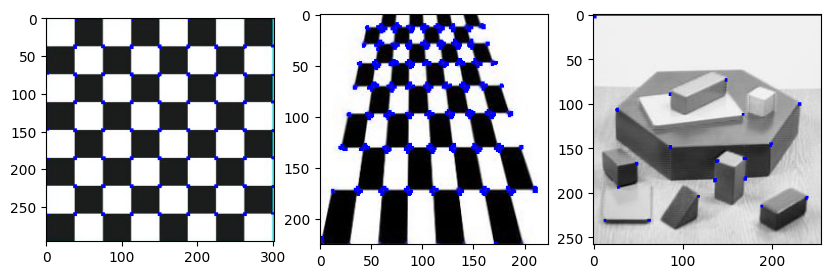

In [4]:
img = cv.imread('../img/chess_board.jpg')
img1 = cv.imread('../img/chess_board_streched.jpg')
img2 = cv.imread('../img/blocks.jpg')

def foo(img, cr=0.1):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,3,0.04)
    dst = cv.dilate(dst,None)
    img[dst>cr*dst.max()]=[0,0,255]
    return img

img = foo(img)
img1 = foo(img1)
img2 = foo(img2, cr=0.01)

fig, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(img)
ax[1].imshow(img1)
ax[2].imshow(img2)
plt.show()

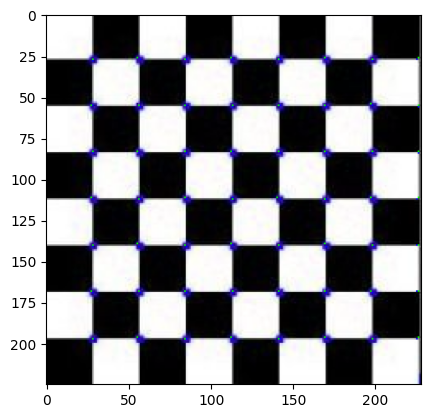

In [11]:
img = cv.imread('../img/chess_board_1.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int64(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
plt.imshow(img)
plt.show()

# [Shi-Tomasi Corner Detector & Good Features to Track](https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html)

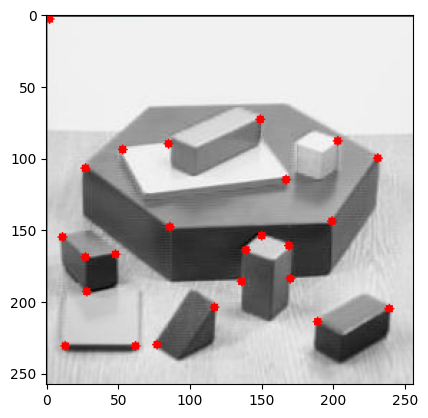

In [15]:
img = cv.imread('../img/blocks.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int32(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img)
plt.show()

# [Introduction to SIFT (Scale-Invariant Feature Transform)](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html)

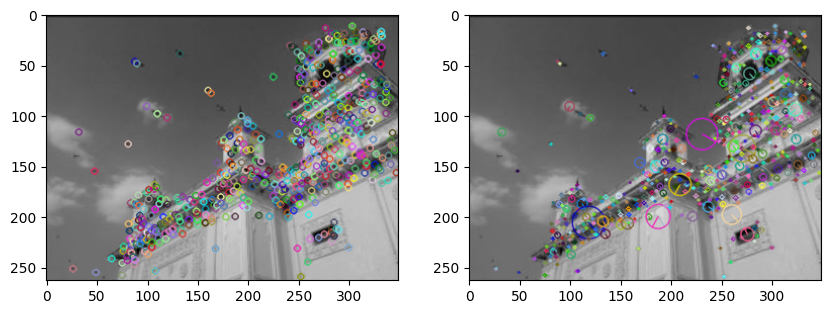

In [16]:
img = cv.imread('../img/home.png')
img1 = img.copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img = cv.drawKeypoints(gray,kp,img)
img1 = cv.drawKeypoints(gray,kp,img1,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(img)
ax[1].imshow(img1)
plt.show()

In [17]:
kp, des = sift.compute(gray, kp)
for k, d in zip(kp, des):
    print(k, d)

< cv2.KeyPoint 0000017C7E2AA210> [  1.   4.  18.  17.   7.   2.   2.   1.   1.  16.  65.  48.   3.   0.
   2.   1.  15.  64.  48.   9.   0.   0.   1.   1.   5.   4.   0.   0.
   0.   0.   0.   0.   4.  14.   8.  58.  46.   7.  15.   6.  27.  49.
  82. 145. 105.  17.  11.  14. 145. 145.  71.  46.   3.   2.   5.  38.
  38.   6.   0.   0.   0.   0.   0.   2.  57.  39.  10.  27.  68.  50.
  10.  20.  23.   7.   5.  77. 126. 145. 145.  95. 145.  18.   5.   7.
   3.   8.  98. 145.  23.   0.   2.   0.   1.   0.   0.  10.  23.   4.
   9.   1.   1.  13.   9.  26.   3.   5.   8.   2.   2.  26.  54.  19.
   4.  13.  22.   0.   0.   0.  19.  31.   0.   4.  24.   1.   0.   0.
   0.   1.]
< cv2.KeyPoint 0000017C7E451A80> [  0.   0.   0.   1.   1.   1.  11.  13.   2.   3.  39.  46.  10.   3.
   5.   7.  11.  45.  74.  21.  28.  40.  10.   3.  23.  12.   3.   5.
  18.  51.  64.  52.   0.   0.   0.   9.  26.   5.  11.  18.  10.  17.
  67. 139. 139.  59.   9.   5. 139. 139. 109.  71.  22.  16.  10.  24.